In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to prepare and create sequences of data
def create_dataset(df, sequence_size):
    # Convert the single column into a NumPy array
    data = df['Intensity'].values.astype(np.float32)

    # Calculate the number of samples
    num_samples = len(data) // sequence_size

    # Split the data into samples
    X = np.array([data[i * sequence_size:(i + 1) * sequence_size] for i in range(num_samples) if len(data[i * sequence_size:(i + 1) * sequence_size]) == sequence_size])

    # Calculate the minimum and maximum values across the entire X array
    # Scale X to range [-1, 1]
    min_val = np.min(X)
    max_val = np.max(X)
    X_scaled = 2 * (X - min_val) / (max_val - min_val) - 1

    return X_scaled


In [3]:

# Load data from all devices
df1 = pd.read_csv("puf_dataset_07_14/2Can-D1-50mA.csv")
df2 = pd.read_csv("puf_dataset_07_14/2Can-D2-50mA.csv")
df3 = pd.read_csv("puf_dataset_07_14/2Can-D3-50mA.csv")
df4 = pd.read_csv("puf_dataset_07_14/2Can-D4-50mA.csv")
df5 = pd.read_csv("puf_dataset_07_14/2Can-D5-50mA.csv")
df7_1 = pd.read_csv("puf_dataset_07_14/2Can-D7-50mA-long1.csv")
df7_2 = pd.read_csv("puf_dataset_07_14/2Can-D7-50mA-long2.csv")
df7_3 = pd.read_csv("puf_dataset_07_14/2Can-D7-50mA-long3.csv")
df7_4 = pd.read_csv("puf_dataset_07_14/2Can-D7-50mA-long4.csv")
df7 = pd.concat([df7_1, df7_2, df7_3, df7_4], axis=0)
df7 = df7.reset_index(drop=True)
df8 = pd.read_csv("puf_dataset_07_14/2Can-D8-50mA-w.csv")
df10_1 = pd.read_csv("puf_dataset_07_14/2Can-D10-50mA.csv")
df10_2 = pd.read_csv("puf_dataset_07_14/2Can-D10-50mA-long2.csv")
df10_3 = pd.read_csv("puf_dataset_07_14/2Can-D10-50mA-long3.csv")
df10_4 = pd.read_csv("puf_dataset_07_14/2Can-D10-50mA-long4.csv")
df10 = pd.concat([df10_1, df10_2, df10_3, df10_4], axis=0)
df10 = df10.reset_index(drop=True)
df10_p2 = pd.read_csv("puf_dataset_07_14/p-2Can-D10-50mA.csv")

df1_old = pd.read_csv("puf_dataset_07_08/Can-D1-50mA2.csv")
df2_old = pd.read_csv("puf_dataset_07_08/Can-D2-50mA2.csv")
df3_old = pd.read_csv("puf_dataset_07_08/Can-D3-50mA.csv")
df4_old = pd.read_csv("puf_dataset_07_08/Can-D4-50mA.csv")
df5_old = pd.read_csv("puf_dataset_07_08/Can-D5-50mA.csv")
df6_old = pd.read_csv("puf_dataset_07_08/Can-D6-50mA.csv")
df7_old = pd.read_csv("puf_dataset_07_08/Can-D7-50mA.csv")
df10_old = pd.read_csv("puf_dataset_07_08/Can-D10-50mA.csv")


/var/folders/33/p53182xj2hs7m7dxvsm13bvw0000gn/T/ipykernel_11103/3119832254.py:14: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df10_1 = pd.read_csv("puf_dataset_07_14/2Can-D10-50mA.csv")
/var/folders/33/p53182xj2hs7m7dxvsm13bvw0000gn/T/ipykernel_11103/3119832254.py:15: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df10_2 = pd.read_csv("puf_dataset_07_14/2Can-D10-50mA-long2.csv")
/var/folders/33/p53182xj2hs7m7dxvsm13bvw0000gn/T/ipykernel_11103/3119832254.py:16: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df10_3 = pd.read_csv("puf_dataset_07_14/2Can-D10-50mA-long3.csv")
/var/folders/33/p53182xj2hs7m7dxvsm13bvw0000gn/T/ipykernel_11103/3119832254.py:17: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df10_4 = pd.read_csv("puf_dataset_07_14/2Can-D10-50mA-long4.

In [4]:
# Construct the correlation matrix for samples from all devices
X1 = create_dataset(df1, 10000)
X2 = create_dataset(df2, 10000)
X3 = create_dataset(df3, 10000)
X4 = create_dataset(df4, 10000)
X5 = create_dataset(df5, 10000)
X6 = create_dataset(df7, 10000)
X7 = create_dataset(df8, 10000)
X8 = create_dataset(df10, 10000)
X9 = create_dataset(df10_p2, 10000)
X10 = create_dataset(df1_old, 10000)
X11 = create_dataset(df2_old, 10000)
X12 = create_dataset(df3_old, 10000)
X13 = create_dataset(df4_old, 10000)
X14 = create_dataset(df5_old, 10000)
X15 = create_dataset(df6_old, 10000)
X16 = create_dataset(df7_old, 10000)
X17 = create_dataset(df10_old, 10000)

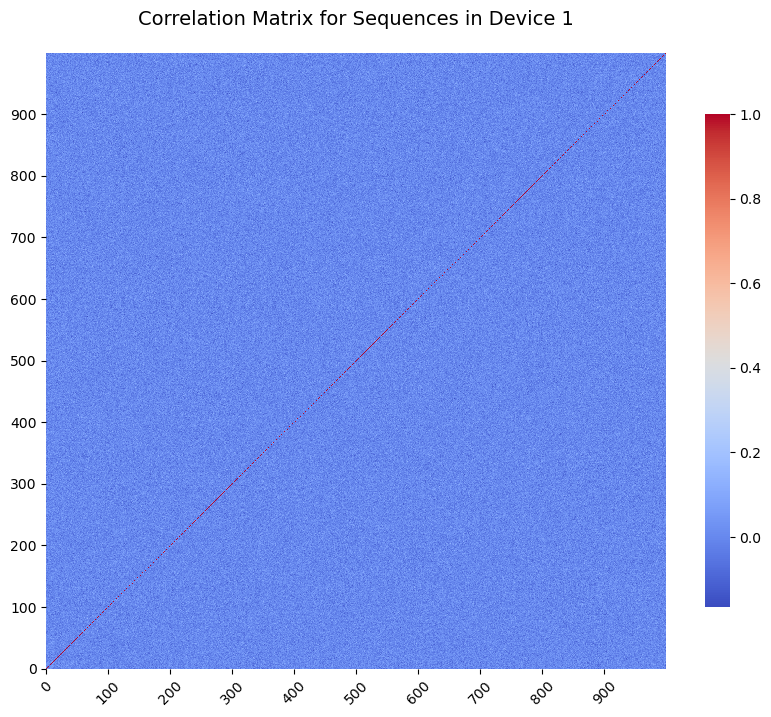

In [15]:
# Plot correlation matrix among sequences within one device
# Take the first 50 data points
intradev_data = X1[:1000]
num_sequences_intradev = intradev_data.shape[0]
corr_coeff_within_dev_mat = np.corrcoef(intradev_data, rowvar=True)

# Set up the figure with a larger size
plt.figure(figsize=(10, 8))

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_coeff_within_dev_mat, 
            cmap='coolwarm',  # Use a visually appealing colormap
            annot=False,       # Do not display values
            xticklabels=False,
            yticklabels=False,  # Number sequences on the y-axis
            cbar_kws={'shrink': 0.8}  # Shrink the colorbar slightly
           )

# Set spacing of tick marks
spacing_intradev = num_sequences_intradev // 10
tick_positions_intradev = np.arange(0, num_sequences_intradev, spacing_intradev)

# Dynamically set ticks and label appearance
plt.xticks(tick_positions_intradev, tick_positions_intradev, rotation=45, fontsize=10)  # Rotate x-axis labels
plt.yticks(tick_positions_intradev, tick_positions_intradev, fontsize=10)

# Invert Y-axis to ensure 0 starts from the bottom
plt.gca().invert_yaxis()

plt.title('Correlation Matrix for Sequences in Device 1', fontsize=14, pad=20)

# Save the figure
plt.savefig('figures/corr_coeff/correlation_matrix_intradev.png', dpi=300, bbox_inches='tight')

In [16]:
# Plot correlation matrix among sequences across devices
dev1_cut_data = X1[-200:]
dev2_cut_data = X2[-200:]
dev3_cut_data = X3[-200:]
dev4_cut_data = X4[-200:]
dev5_cut_data = X5[-200:]
dev7_cut_data = X7[-200:]
dev8_cut_data = X8[-200:]
dev10_cut_data = X10[-200:]
dev11_cut_data = X11[-200:]
dev12_cut_data = X12[-200:]
dev13_cut_data = X13[-200:]
dev14_cut_data = X14[-200:]
dev15_cut_data = X15[-200:]
dev16_cut_data = X16[-200:]
dev17_cut_data = X17[-200:]

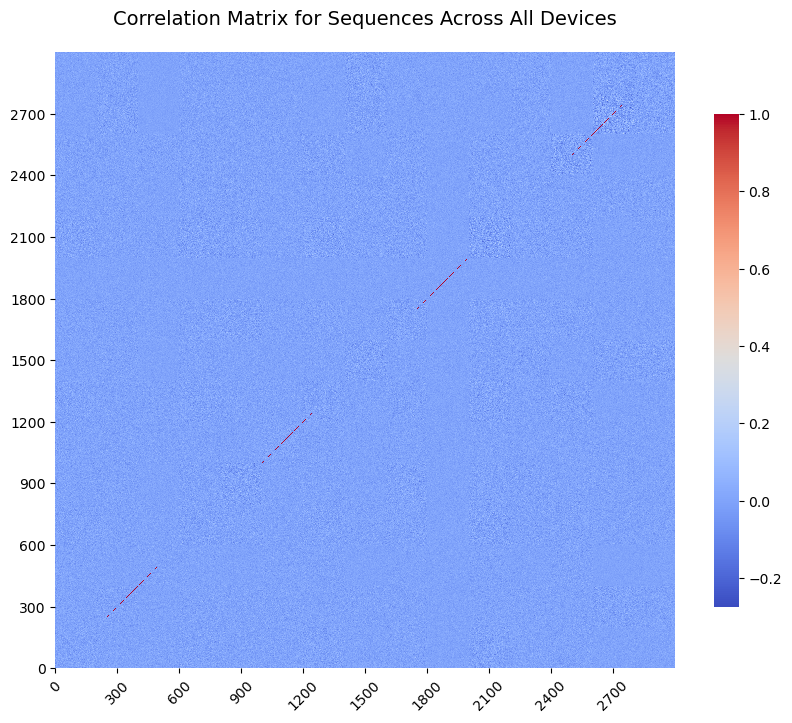

In [21]:
# Concatenate the data from all devices
acrossdev_data = np.concatenate((dev1_cut_data, dev2_cut_data, dev3_cut_data, dev4_cut_data, dev5_cut_data, dev7_cut_data, dev8_cut_data, dev10_cut_data, dev11_cut_data, dev12_cut_data, dev13_cut_data, dev14_cut_data, dev15_cut_data, dev16_cut_data, dev17_cut_data), axis=0)
num_sequences_acrossdev = acrossdev_data.shape[0]

# Compute correlation matrix
corr_coeff_across_dev_mat = np.corrcoef(acrossdev_data, rowvar=True)

# Set up the figure with a larger size
plt.figure(figsize=(10, 8))

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_coeff_across_dev_mat, 
            cmap='coolwarm',  # Use a visually appealing colormap
            annot=False,       # Do not display values
            xticklabels=False,
            yticklabels=False,  # Number sequences on the y-axis
            cbar_kws={'shrink': 0.8}  # Shrink the colorbar slightly
           )

# Set spacing of tick marks
spacing_acrossdev = num_sequences_acrossdev // 10
tick_positions_acrossdev = np.arange(0, num_sequences_acrossdev, spacing_acrossdev)

# Dynamically set ticks and label appearance
plt.xticks(tick_positions_acrossdev, tick_positions_acrossdev, rotation=45, fontsize=10)  # Rotate x-axis labels
plt.yticks(tick_positions_acrossdev, tick_positions_acrossdev, fontsize=10)

# Invert Y-axis to ensure 0 starts from the bottom
plt.gca().invert_yaxis()

plt.title('Correlation Matrix for Sequences Across All Devices', fontsize=14, pad=20)

# Save the figure
plt.savefig('figures/corr_coeff/correlation_matrix_acrossdev.png', dpi=300, bbox_inches='tight')